In [ ]:
# 1. 종목코드 가져오기

### 1. 라이브러리 정의

In [11]:
import urllib.parse
import pandas as pd

### 2. 마켓타입 DICT 및 URL 정의

In [13]:
MARKET_CODE_DICT = {
    'kospi': 'stockMkt',
    'kosdaq': 'kosdaqMkt',
    'konex': 'konexMkt'
}

DOWNLOAD_URL = 'https://kind.krx.co.kr/corpgeneral/corpList.do'

### 3. 함수정의

In [2]:
def zeroFill(columnValue):
    columnValue = str(columnValue)
    outValue = columnValue.zfill(6)
    return outValue

In [7]:
def get_stock_codes(market=None, delisted=False):
    params = {'method': 'download'}

    if market.lower() in MARKET_CODE_DICT:
        ## marketType 키 추가
        params['marketType'] = MARKET_CODE_DICT[market]
        print(market.lower()+" market key is exist")
    else:
        #params['searchType'] = 13
        print("invalid market")

    # make url  key=value & key = value
    params_string = urllib.parse.urlencode(params)
    request_url = DOWNLOAD_URL+"?"+params_string

    df = pd.read_html(request_url, header=0)[0]
    df["종목코드"] = df.종목코드.apply(zeroFill)

    return df

### 4. 종목코드 가져오기

In [15]:
stocks = get_stock_codes('kospi')
stocks.head(2)

kospi market key is exist


,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,JS전선,005560,절연선 및 케이블 제조업,"선박선,고무선,전력선,통신선 제조",2007-11-12,12월,이익희,http://www.jscable.co.kr,충청남도
1,거북선2호,101380,NaN,운송장비(선박) 임대,2008-04-25,12월,신주선,NaN,부산광역시


In [9]:
mystock = input("Enter a stock_name: ")

Enter a stock_name: CJ제일제당


In [10]:
stock_codeDF = stocks[ (stocks.회사명==mystock) ][['회사명','종목코드']]
stock_codeDF

,회사명,종목코드
799,CJ제일제당,097950


### 주식 매도/매수 결정

### 관심종목 변수 정의

In [18]:
stock_code = stock_codeDF.iloc[0]['종목코드']
stock_name = stock_codeDF.iloc[0]['회사명']
print(stock_name)
print(stock_code)

CJ제일제당
097950


### 1. 라이브러리 정의

In [20]:
import FinanceDataReader as web
from datetime import date, timedelta
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [22]:
#font setting for window
#font setting for mac (AppleGothic)
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9) 

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

Populating the interactive namespace from numpy and matplotlib


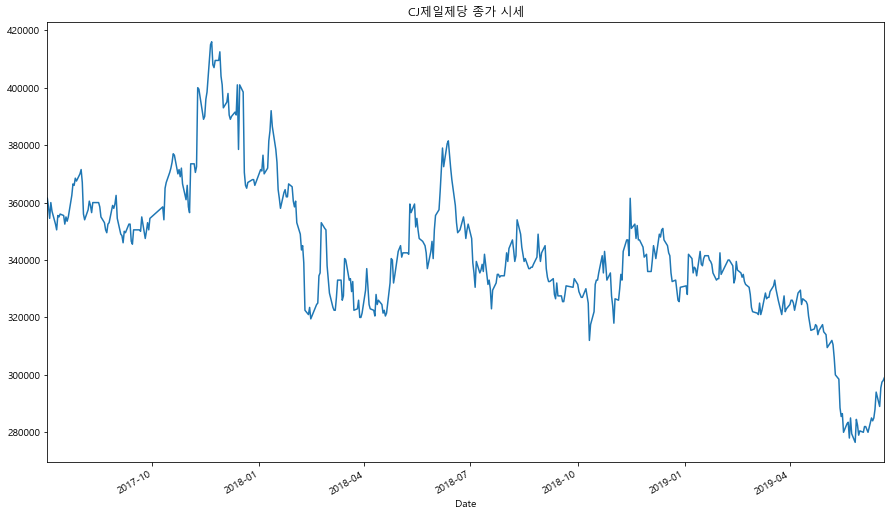

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-06-17,294000,294000,288500,289000,29117,-0.017007
2019-06-18,289500,295500,289500,295500,32169,0.022491
2019-06-19,295000,299500,292500,297500,36179,0.006768
2019-06-20,296000,298500,296000,298000,26386,0.001681
2019-06-21,296500,299500,296000,299000,3421,0.003356


In [25]:
end = date.today()
start = date.today() - timedelta(720)

SEC = web.DataReader(stock_code, start, end)
SEC['Close'].plot(style='-')
plt.title(stock_name+" 종가 시세")
plt.show()

SEC.tail()

In [26]:
SEC['MA_5']=SEC['Close'].rolling(window=5).mean()
SEC['MA_20']=SEC['Close'].rolling(window=20).mean()
SEC['diff']=SEC['MA_5']-SEC['MA_20']
SEC.tail(5)

,Open,High,Low,Close,Volume,Change,MA_5,MA_20,diff
Date,,,,,,,,,
2019-06-17,294000,294000,288500,289000,29117,-0.017007,288000.0,283050.0,4950.0
2019-06-18,289500,295500,289500,295500,32169,0.022491,290300.0,283675.0,6625.0
2019-06-19,295000,299500,292500,297500,36179,0.006768,292800.0,284375.0,8425.0
2019-06-20,296000,298500,296000,298000,26386,0.001681,294800.0,285375.0,9425.0
2019-06-21,296500,299500,296000,299000,3421,0.003356,295800.0,286075.0,9725.0


In [34]:
SEC.dtypes

Open        int64
High        int64
Low         int64
Close       int64
Volume      int64
Change    float64
MA_5      float64
MA_20     float64
diff      float64
dtype: object

In [41]:
# plot index
plot_end = date.today()
plot_start = date.today() - timedelta(120) 
SEC = SEC[plot_start:plot_end]

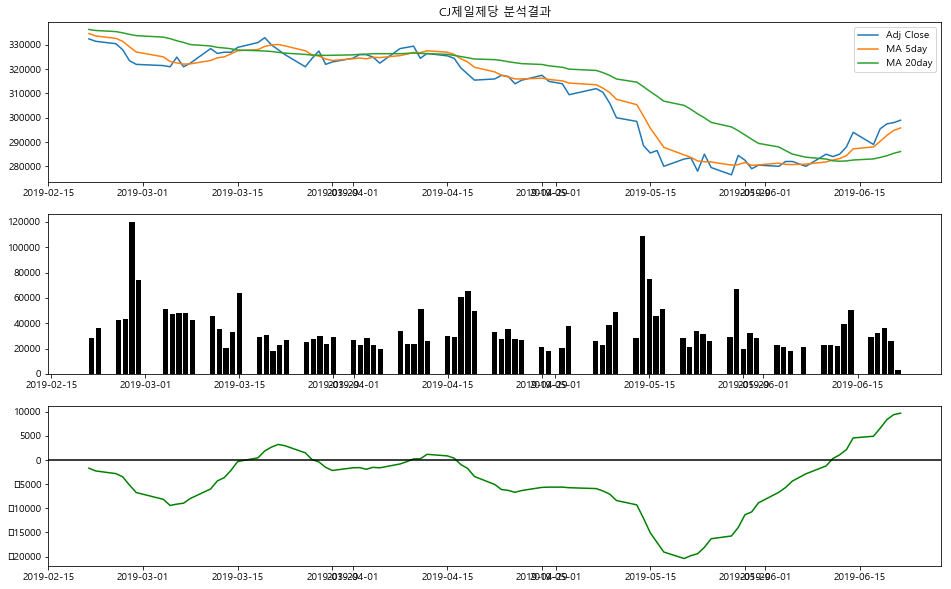

In [43]:
plt.figure(figsize = (16,10))

#price (가격)
plt.subplot(311)
plt.plot(SEC.index, SEC['Close'], label = 'Adj Close')
plt.plot(SEC.index, SEC['MA_5'], label='MA 5day')
plt.plot(SEC.index, SEC['MA_20'], label='MA 20day')
plt.title(u'삼성바이오로직스 2018')
plt.title(stock_name+" 분석결과")
plt.legend(loc='best')

# volume (거래량)
plt.subplot(312)
plt.bar(SEC.index, SEC['Volume'], color='black')

#  이동평균 차이 (diff)
diffChart = plt.subplot(313)
diffChart.plot(SEC.index, SEC['diff'].fillna(0), color='g')
plt.axhline(y=0, color='k')

C:\Users\kopo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kopo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


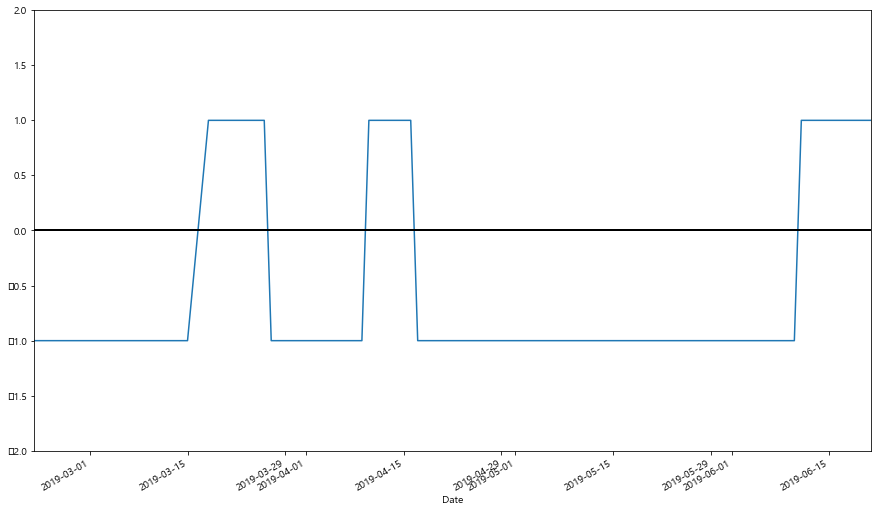

In [45]:

# np.where() is a vectorized if-else function, where a condition is checked for each component of a vector, and the first argument passed is used when the condition holds, and the other passed if it does not
SEC["Regime"] = np.where(SEC['diff'] > 0, 1, 0)
# We have 1's for bullish regimes and 0's for everything else. Below I replace bearish regimes's values with -1, and to maintain the rest of the vector, the second argument is apple["Regime"]
SEC["Regime"] = np.where(SEC['diff'] < 0, -1, SEC["Regime"])
SEC.loc[start:end,"Regime"].plot(ylim = (-2,2)).axhline(y = 0, color = "black", lw = 2)